In [78]:
import pandas

# Part A

In [4]:
hdf = pandas.read_csv('~/summer19/dsiitgsummer19/Assignment 2/houses.csv', header = None)
hdf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,{02A6460F-C1F3-4977-B7ED-2A77C79302AE},52000,2001-12-07 00:00,DE6 1BL,S,N,F,1A,NaN,OLD HILL,ASHBOURNE,ASHBOURNE,DERBYSHIRE DALES,DERBYSHIRE,A,A
1,{5EEB0C41-09F5-4BDF-A73E-A4E72E20BFC4},57000,2003-09-12 00:00,B36 0RA,T,N,F,44,NaN,GREENFINCH ROAD,BIRMINGHAM,BIRMINGHAM,SOLIHULL,WEST MIDLANDS,A,A
2,{09975216-3588-418C-B6C5-A5704B0E77DE},69500,2005-12-21 00:00,OL16 2XR,T,N,L,143,NaN,BELFIELD ROAD,ROCHDALE,ROCHDALE,ROCHDALE,GREATER MANCHESTER,A,A
3,{44CB83B9-0EC3-48D4-9B8D-B34D13D3C09E},84000,2001-01-31 00:00,SN1 4LJ,T,N,F,34,NaN,KINGSHILL ROAD,SWINDON,SWINDON,SWINDON,SWINDON,A,A
4,{74828706-CBFC-406D-B7B6-394B5863E22E},110000,1998-02-27 00:00,OX3 8AJ,S,N,F,62,NaN,WHARTON ROAD,HEADINGTON,OXFORD,OXFORD,OXFORDSHIRE,A,A


In [5]:
pddf = hdf.iloc[:, 1].describe()
pddf

count    1.000000e+05
mean     1.743868e+05
std      3.514634e+05
min      1.500000e+02
25%      7.400000e+04
50%      1.290000e+05
75%      2.070000e+05
max      4.846572e+07
Name: 1, dtype: float64

In [11]:
%matplotlib inline

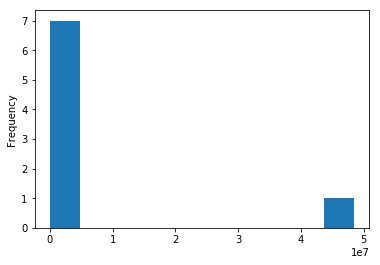

In [7]:
pddf.plot(kind = 'hist')

# Why is it so ugly? What can you do to make it more informative?

    The histogram considers the numbers as categorical data, not quantitative data, hence, when we plot the histogram, it shows us the count, that how many values are of the form (i * 1e7) where i ranges from 0 to 5, here.
    To make it more informative, we can plot a bar graph instead of the histogram. The bar graph would consider the values as quantitative values, and plot each value as a correspondence to some tag.

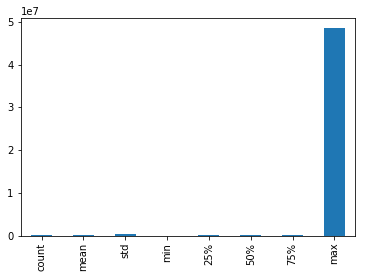

In [8]:
pddf.plot(kind = 'bar')

    But here too, the graph isn't a good one, as the only inference we can make is that the maximum is very large as compared to the other variables.
    The graph can be made a logarithmic one on the y-axis to get better visibility over all parameters, but poor comparability of data.
    P.S. count should not be compared anyways

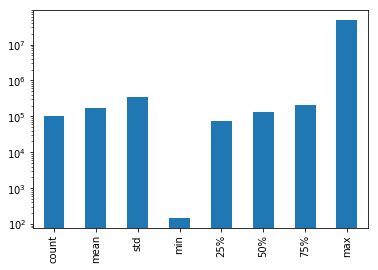

In [13]:
import matplotlib
matplotlib.pyplot.yscale('log')
pddf.plot(kind = 'bar')

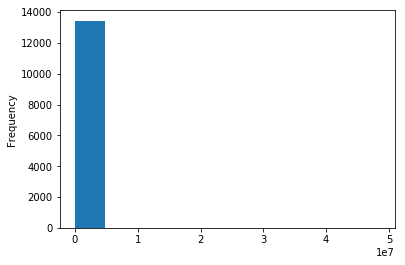

In [14]:
hdf1 = hdf[hdf.iloc[:, 13] == 'GREATER LONDON'].iloc[:, 1]
hdf1.plot(kind = 'hist')

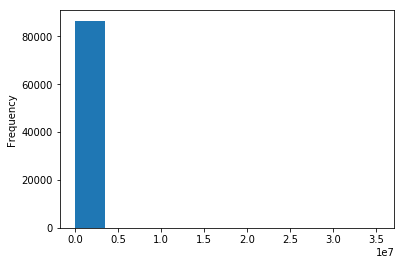

In [15]:
hdf2 = hdf[hdf.iloc[:, 13] != 'GREATER LONDON'].iloc[:, 1]
hdf2.plot(kind = 'hist')

In [16]:
hdf[2] = pandas.to_datetime(hdf[2]).dt.year

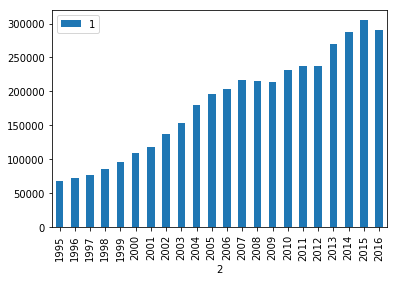

In [18]:
hdf3 = hdf.groupby(2).mean()
hdf3.plot(kind = 'bar')

# Part B

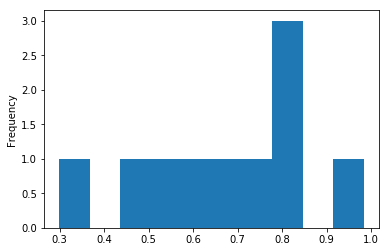

In [34]:
import numpy
nums = numpy.random.rand(10)
pandas.Series(nums).plot(kind = 'hist')

    The shape of this graph is not clearly defined, it has a maximum and val = 0.8, has apparently no entries at val belonging to {0.1, 0.2, 0.4, 0.9} (approx values).

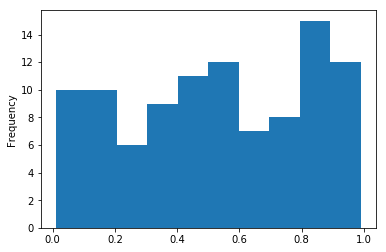

In [35]:
nums2 = numpy.random.rand(100)
pandas.Series(nums2).plot(kind = 'hist')

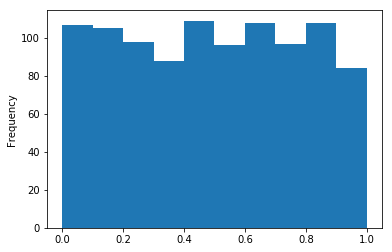

In [38]:
nums3 = numpy.random.rand(1000)
pandas.Series(nums3).plot(kind = 'hist')

    As the size of the data increases, the graph becomes more and more uniform, still ranging between 0 and 1.

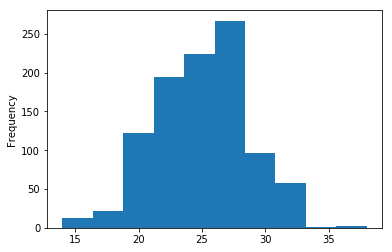

In [71]:
nums4 = numpy.random.binomial(50, 0.5, 1000)
pandas.Series(nums4).plot(kind = 'hist')

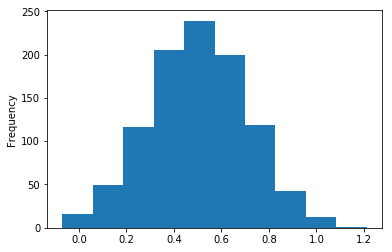

In [77]:
nums5 = numpy.random.normal(0.5, 0.2, 1000)
pandas.Series(nums5).plot(kind = 'hist')

    The shape now is symmetric and unimodal.

# Part C (a)

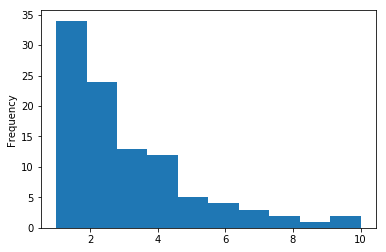

In [146]:
def number_of_attempts(p_pass):
    attempts = 1
    while numpy.random.rand() > p_pass:
        attempts += 1
    return attempts

a = []
for i in range(100):
    a += [number_of_attempts(0.4)]
pandas.Series(a).plot(kind = 'hist')

# Part C (b)

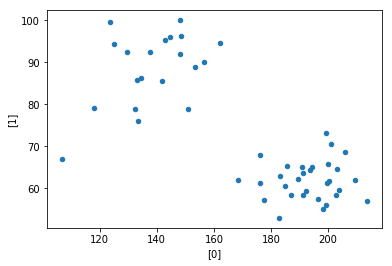

In [159]:
def HnW():
    if numpy.random.rand() > 0.4:
        height = numpy.random.normal(195, 10)
        weight = numpy.random.normal(60, 5)
    else:
        height = numpy.random.normal(140, 15)
        weight = numpy.random.normal(90, 10)
    return [height, weight]

b = []
for i in range(50):
    b += [HnW()]
pandas.DataFrame(b).plot(kind = 'scatter', x = [0], y = [1])

    As we can see that there are two separate groups here, we can draw a (m = 1 (approx)) line in the middle, and count the number of datapoints on each side to get the percentage populations of each group.
    Then, treating each group separately, we can find the mean, standard deviation etc.